# Lecture 13

- Prerequisite for Lesson 2: Data Preparation.
- Lesson 2: Data Preparation.
- some of the Prerequisite for Lesson 3.

# In programming 
- `True` is sometimes the same as `1`
- `False` is somestimes the same as `0`

In [38]:
sum([True, True, False, True, False])

3

## Introduction to Data Preparation

Have you ever worked on a spreadsheet that’s full of errors such as typos, missing data, or duplicated data? Dirty data like this is the scourge of financial analysis—and it commonly appears. However, working with flawed data leads to a flawed analysis. It’s essential to prepare and clean any dataset before you analyze it, which you can do with the built-in functions that Pandas supplies.

In this lesson, you’ll learn how to prepare data for analysis. You’ll use tools and techniques to identify and fix missing data, duplicate data, messy text, and incorrect data types. With these skills, you’ll be able to tackle even the messiest dataset.

Analysts commonly encounter the problem of missing data. Missing data can result from a human or computer error or even from a real-world event, like the market closing.


<b> Before you start any analysis, you need to handle missing values to avoid erroneous visualizations or incorrect calculations.
Pandas typically represents missing values by using a data type known as `NaN`, which stands for Not a Number. You can think of a `NaN` as a placeholder for missing data.</b>




NOTE:
Every programming language has ways to represent missing values, depending on what you want to do with the data. Two of the main ways are null and NaN, and NaN is a more-sophisticated representation that’s specific to Pandas. A NaN has many useful properties, which you can read about in the Pandas documentation about missing data
---------------------------------------------------------------------------------------------------------

The most important benefit of the `NaN` data type is that we can use it with specific Pandas functions. With these functions, we can identify the missing values and then either remove or replace them.

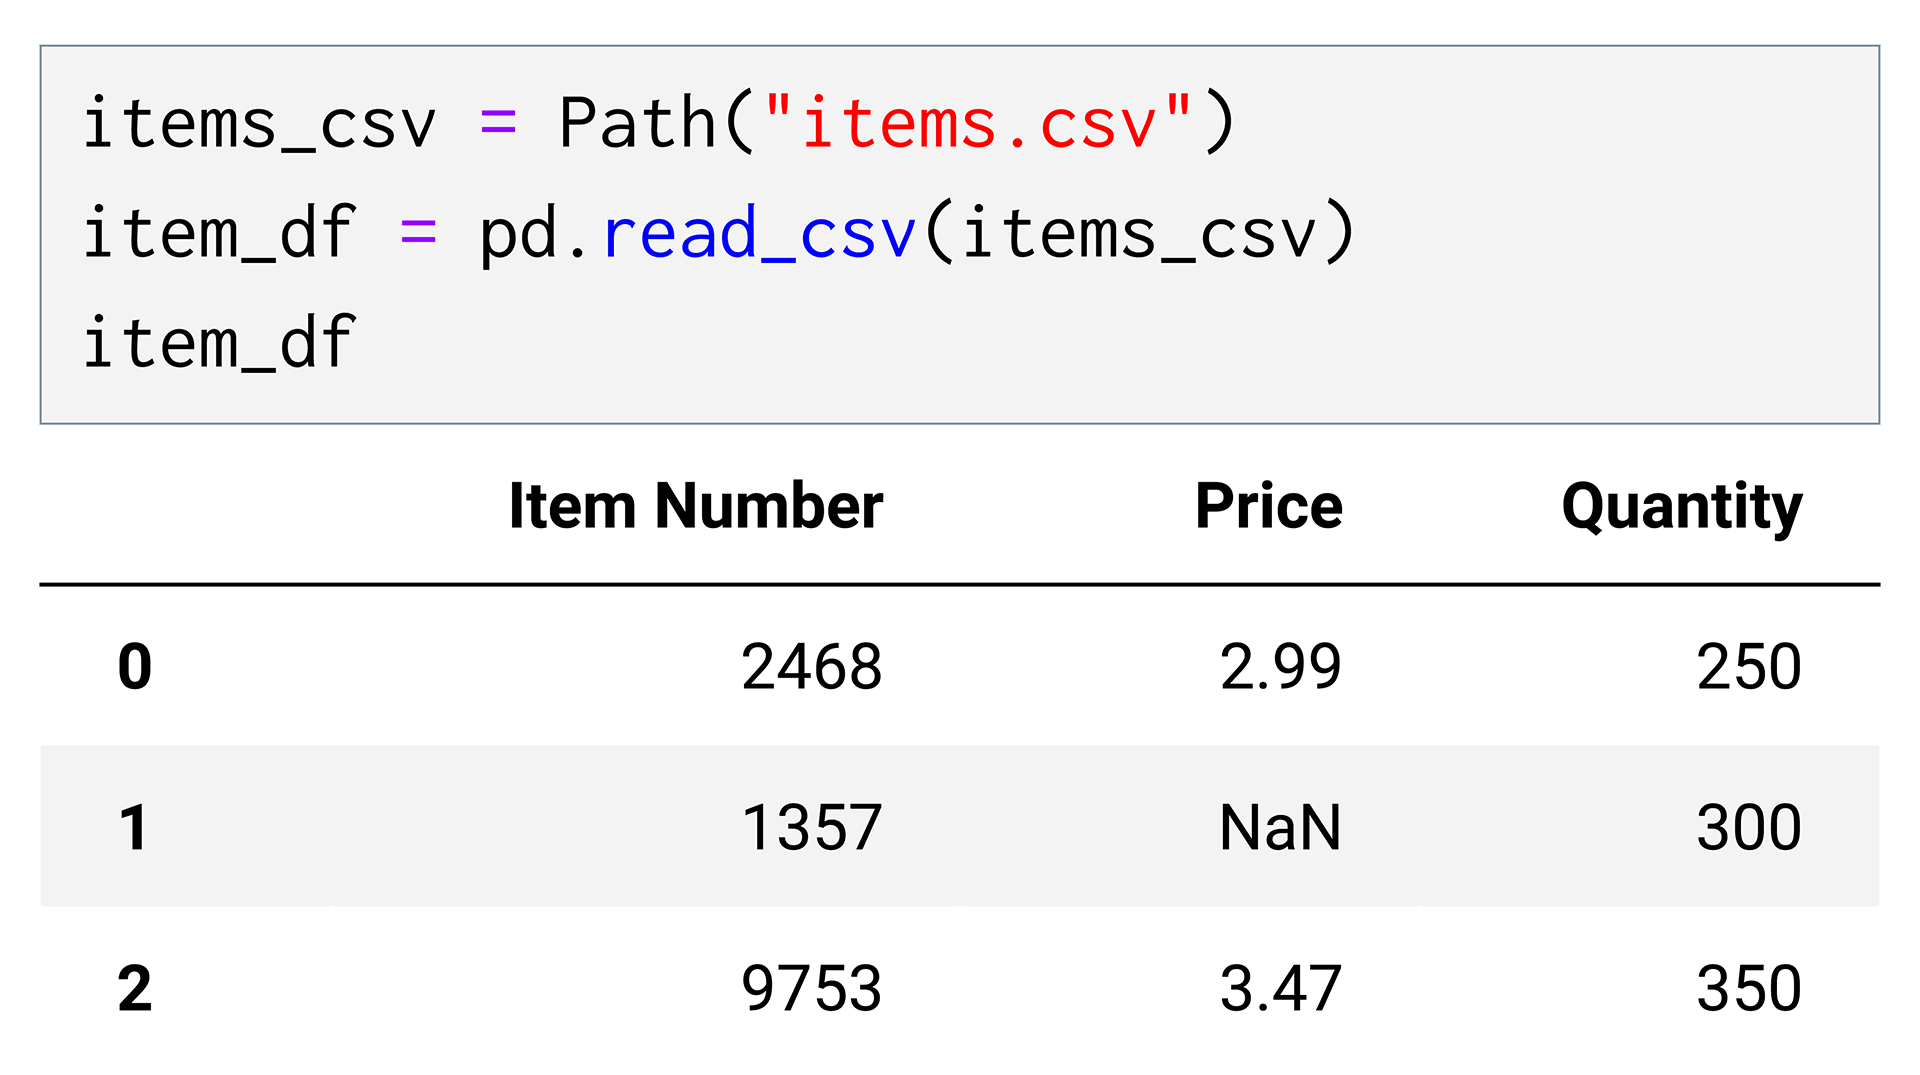

This DataFrame represents the missing value with a NaN. For small datasets like this one, we can identify a missing value by the text “NaN” in the DataFrame output. For large datasets, however, we need tools to find and count how much data is missing.

## Find Missing Data
One of the best tools for finding missing, or null, values is the `isnull` function. This function returns `True` if it finds a NaN value in the DataFrame and `False` otherwise.

Let’s look again at the DataFrame from before. The following image shows that the cell in the second row and second column of the DataFrame contains a `NaN`:

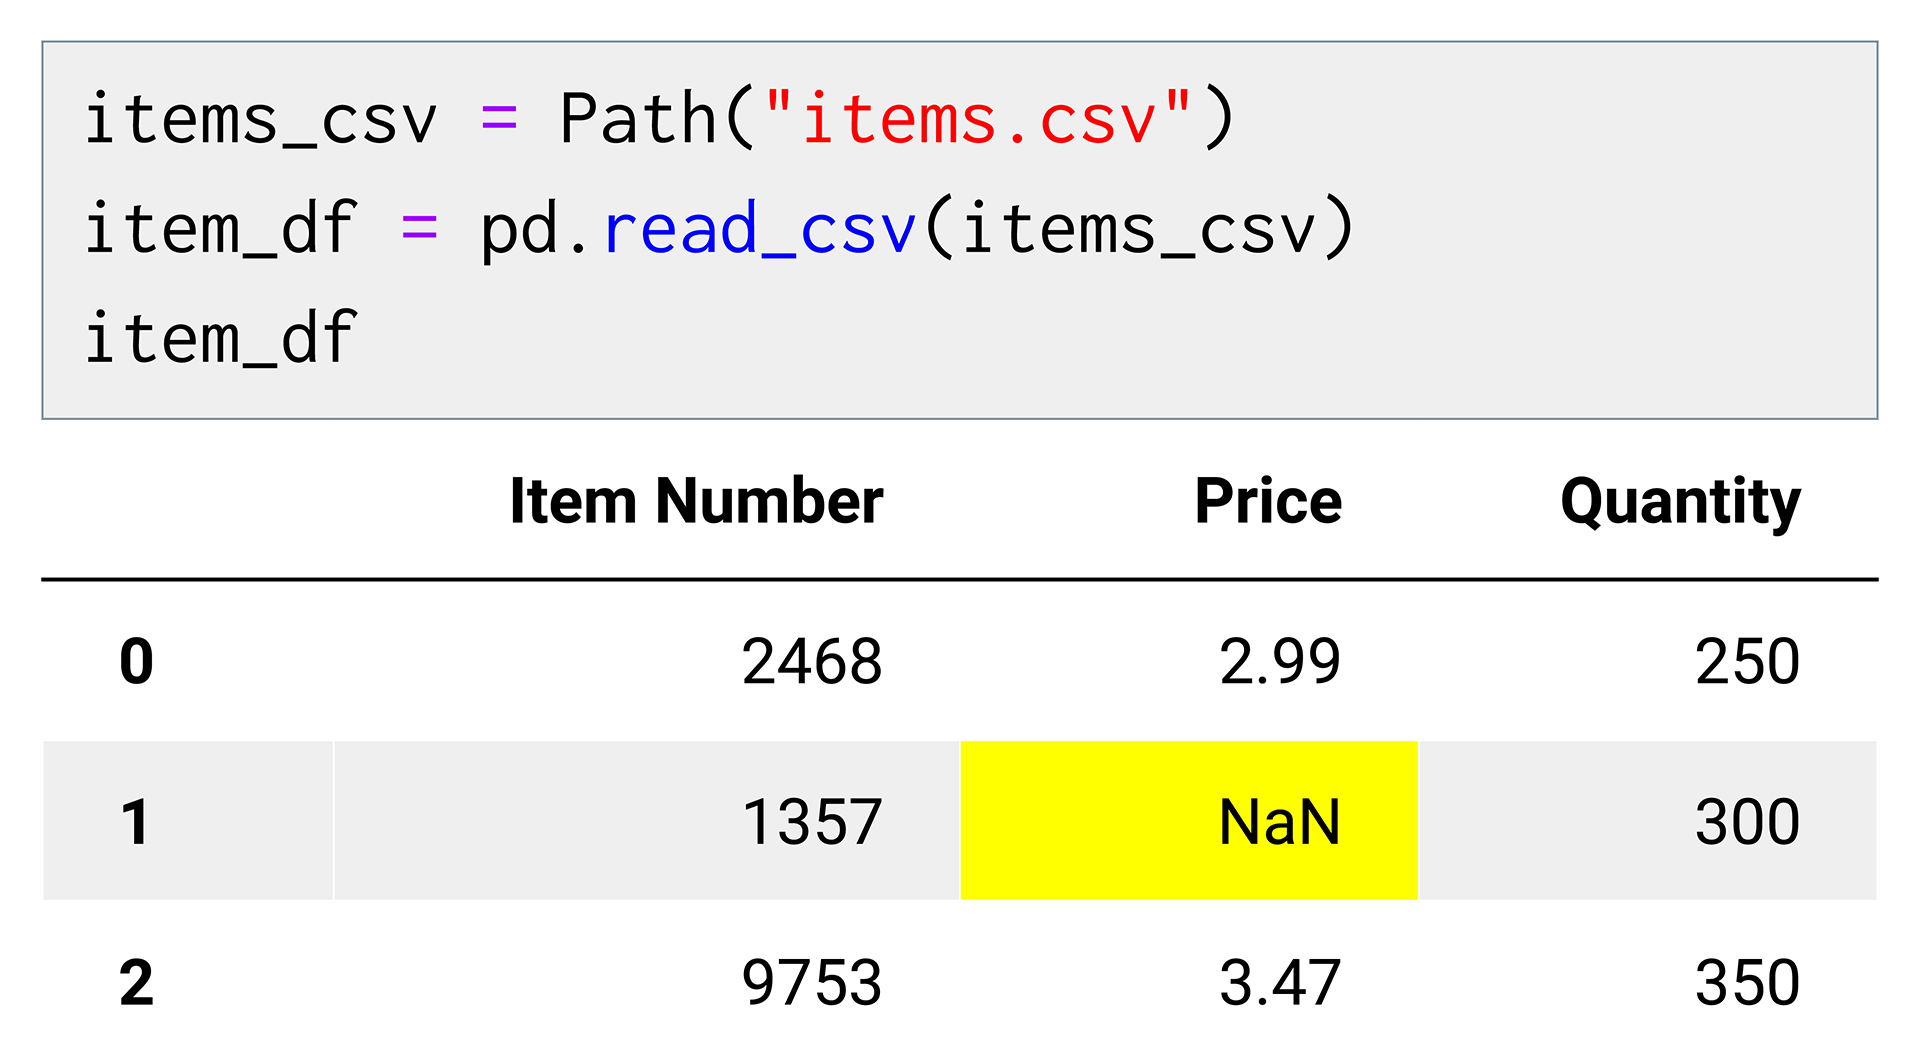




CODE `item_df.isnull().sum()`

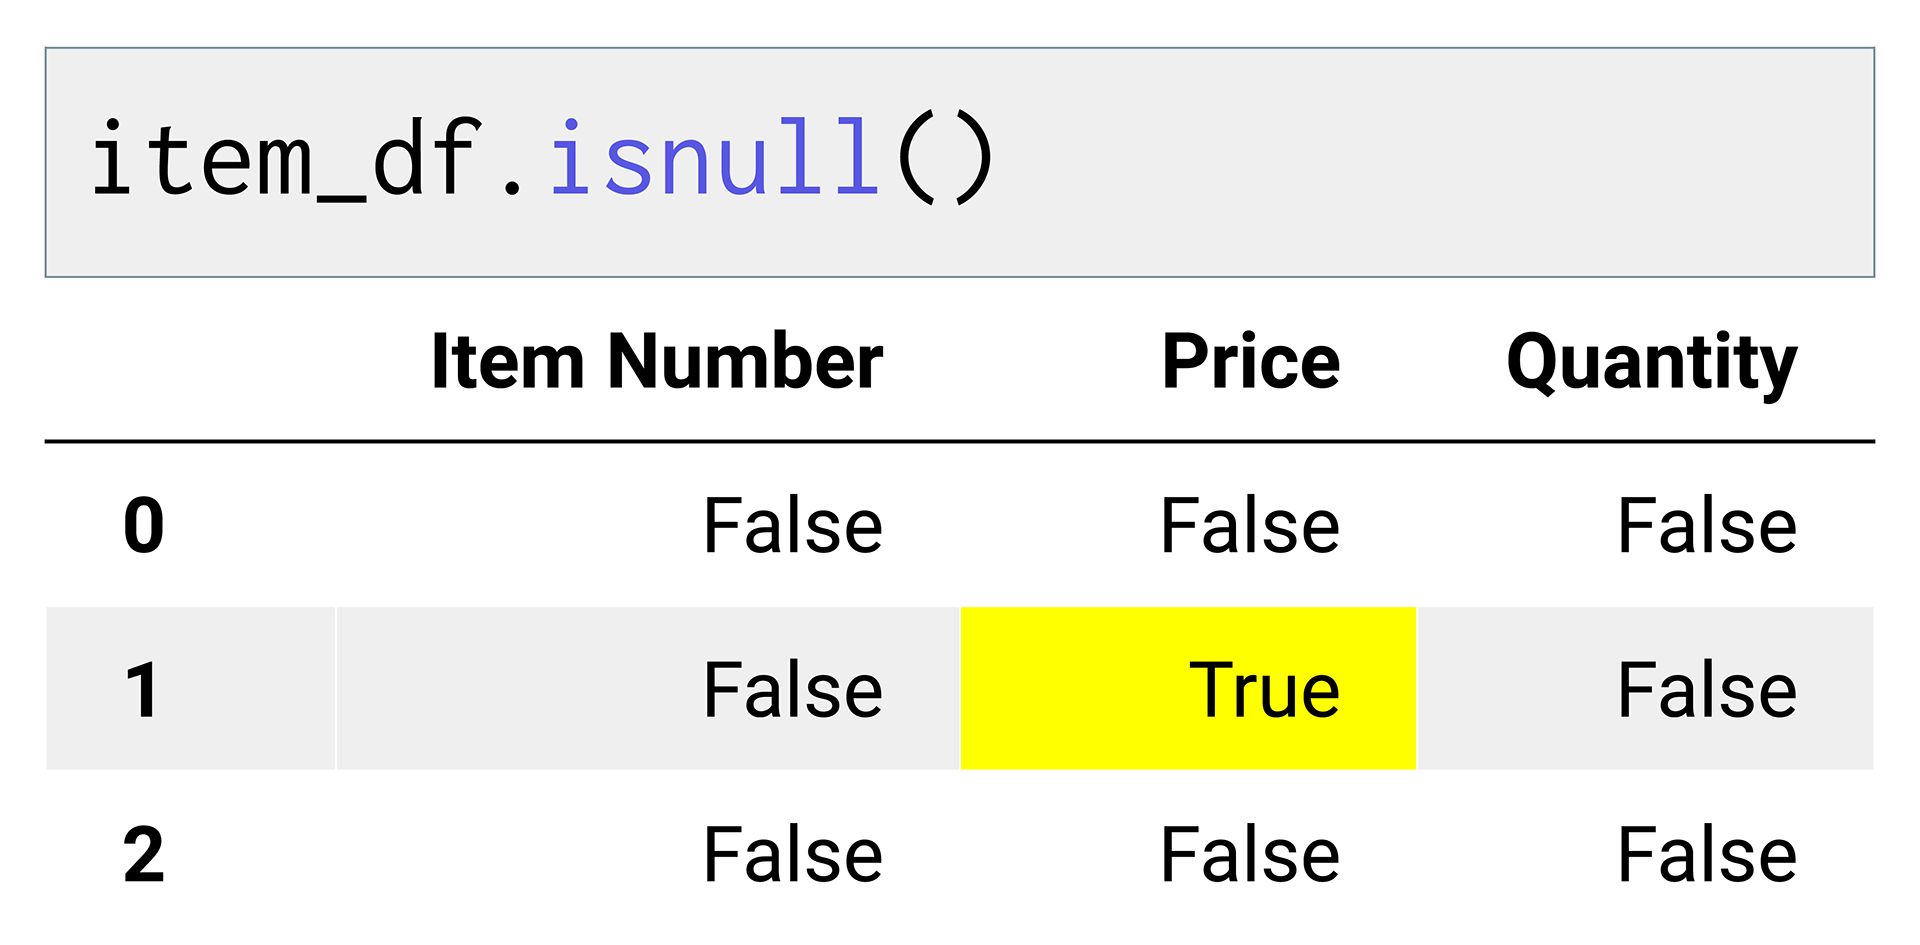

Let's try it on a Dataset.

In [2]:
import numpy as np
import pandas as pd


#loading the data from github repo
df = pd.read_csv("https://raw.githubusercontent.com/OMS1996/DAV-6150-Data-Science/master/Data/M7_Data.csv")

#sanity check
df.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


In [3]:
df.isnull()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2377,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2378,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2379,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Unnamed: 0     0
dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           1
dmi            0
self           1
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

### We can handle missing values in one of two ways: by removing, or dropping, them or by replacing, or filling, them.
#### 1 - Dropping them.
#### 2 - Filling them.

# Drop Missing Data
The first way to deal with missing data is to drop any rows that have missing values. This option is best for large datasets where dropping some rows won’t affect the overall analysis.

To drop rows of data that have missing values, we use the `dropna` function. Let’s try this on a sample dataset.

We will shortly see how to do that. First lets make a mini-data set.

### Making a DataFrame
The following code imports the Pandas and NumPy libraries and then creates a daily_returns DataFrame containing Apple and Google stock data. The DataFrame has three rows, which the code has in brackets and separates by commas:

In [5]:
import pandas as pd
import numpy as np

daily_returns = pd.DataFrame(
    {
    "AAPL": [0.5, np.nan, 0.62],
    "GOOG": [0.45, 0.63, 0.55]
     }
)

In [6]:
daily_returns

,AAPL,GOOG
0,0.50,0.45
1,NaN,0.63
2,0.62,0.55


When we call the dropna function on the daily_returns DataFrame, we get the result that the following image shows:

In [7]:
daily_returns.dropna()

,AAPL,GOOG
0,0.50,0.45
2,0.62,0.55


See what happened? The NaN value is gone along with its whole row of data. Now, only two rows of data remain. As you can see, dropna offers a quick and powerful tool for handling missing data.

Still, we can’t ignore the fact that using dropna just threw away one third of our data. This is fine for an example, but it’s hard to imagine a scenario where eliminating that much data wouldn’t skew some aspect of our analysis. This especially applies in a professional setting, where every data point is thought to have value. So, we have another technique for handling missing data—namely, filling, it.

# Fill Missing Data

When dropping data isn’t an option, financial analysts sometimes fill the missing data with specific values that they can account for in the analysis. The three most-common replacement values are the following:

- "Unknown"

- 0

- mean


- median,mode, bfill, ffill, regression techniques.....etc there are many ways you can fill missing data.

While pros and cons exist for each of these values, you can choose the best replacement for your particular problem. Maybe, you want to flag NaN values with "Unknown". Or, you might want to replace a missing number with either a zero or the average value in that column. This choice is up to you as the analyst. Regardless of your choice, your friend Pandas is there to make the replacement easy with a function called `fillna`.

To use the fillna function, you just supply the function with a replacement value for each NaN—and Pandas handles the rest. Here’s what the code looks like for each option:

In [29]:
df1 = daily_returns.copy()
df2 = daily_returns.copy()
df3 = daily_returns.copy()
df4 = daily_returns.copy()

In [11]:
# Replace the NaNs with "Unknown"
df1 = daily_returns.fillna("Unknown")

# Replace the NaNs with 0
df2 = daily_returns.fillna(0)

# Replace the NaNs with the mean of the column
df3 = daily_returns.fillna(daily_returns.mean())

# Unkown

In [12]:
df1

,AAPL,GOOG
0,0.5,0.45
1,Unknown,0.63
2,0.62,0.55


# 0

In [13]:
df2

,AAPL,GOOG
0,0.50,0.45
1,0.00,0.63
2,0.62,0.55


# Mean filling

In [14]:
df3

,AAPL,GOOG
0,0.50,0.45
1,0.56,0.63
2,0.62,0.55


# Slicing a Pandas Data Frame.

You will use mainly two operators
`:`
and
`,`


`:` means everything.
`,` separates the rows and the cols.


`df [ROW,COLS]`


df [:, Cols]

# Loc vs iloc 

(please read this https://towardsdatascience.com/how-to-use-loc-and-iloc-for-selecting-data-in-pandas-bd09cb4c3d79)

1. Differences between loc and iloc
The main distinction between loc and iloc is:
`loc` is `label-based`, which means that you have to specify `rows` and `columns` based on their row and `column labels`.
`iloc` is integer position-based, so you have to specify `rows and columns` by their integer position values (0-based integer position).

Here are some differences and similarities between loc and iloc :

In [15]:
df.head()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no
3,4,0.320,0.250,0.860465,1.0,2.0,no,no,no,no,4.3,0,no,no
4,5,0.360,0.350,0.600000,1.0,1.0,no,no,no,no,3.2,0,no,no


# Getting a single value getting the value `0.265` from the dataframe.

In [20]:
df.iloc[1, 1]

0.265

# Getting a single Column : lets say column 1 which is `dir`

In [21]:
df.iloc[:, 1]

0       0.221000
1       0.265000
2       0.372000
3       0.320000
4       0.360000
          ...   
2376    0.300000
2377    0.260000
2378    0.320000
2379    0.350000
2380    0.330814
Name: dir, Length: 2381, dtype: float64

# Getting a single row : lets say column 1 

In [22]:
df.iloc[1, :]

Unnamed: 0            2
dir               0.265
hir               0.265
lvr            0.921875
ccs                 2.0
mcs                 2.0
pbcr                 no
dmi                  no
self                 no
single              yes
uria                3.2
comdominiom           0
black                no
deny                 no
Name: 1, dtype: object

# Getting the first 3 rows.

In [18]:
df.iloc[0:3, :]

,Unnamed: 0,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
0,1,0.221,0.221,0.800000,5.0,2.0,no,no,no,no,3.9,0,no,no
1,2,0.265,0.265,0.921875,2.0,2.0,no,no,no,yes,3.2,0,no,no
2,3,0.372,0.248,0.920398,1.0,2.0,no,no,no,no,3.2,0,no,no


# Getting the first 3 columns.

In [19]:
df.iloc[:, 0:3]

,Unnamed: 0,dir,hir
0,1,0.221000,0.221000
1,2,0.265000,0.265000
2,3,0.372000,0.248000
3,4,0.320000,0.250000
4,5,0.360000,0.350000
...,...,...,...
2376,2377,0.300000,0.300000
2377,2378,0.260000,0.200000
2378,2379,0.320000,0.260000
2379,2380,0.350000,0.260000


# Now for the loc

`.loc` works by label.

In [26]:
df.loc[:,'dir']

0       0.221000
1       0.265000
2       0.372000
3       0.320000
4       0.360000
          ...   
2376    0.300000
2377    0.260000
2378    0.320000
2379    0.350000
2380    0.330814
Name: dir, Length: 2381, dtype: float64

In [27]:
df.loc[0:4,'dir']

0    0.221
1    0.265
2    0.372
3    0.320
4    0.360
Name: dir, dtype: float64

In [28]:
df.loc[0:4,['dir','hir']]

,dir,hir
0,0.221,0.221
1,0.265,0.265
2,0.372,0.248
3,0.320,0.250
4,0.360,0.350


# Now lets fill `EXACTLY` what we want

In [30]:
df4.loc[:, "AAPL"] = daily_returns.loc[:, "AAPL"].fillna(0)

df4

,AAPL,GOOG
0,0.50,0.45
1,0.00,0.63
2,0.62,0.55


In [31]:
df4.isnull().sum()

AAPL    0
GOOG    0
dtype: int64

The code uses .loc[:. "AAPL"] to isolate all cells in the AAPL column. It then calls the fillna function with 0 as the argument. The output has NaN replaced with a value of 0, as the following image shows:



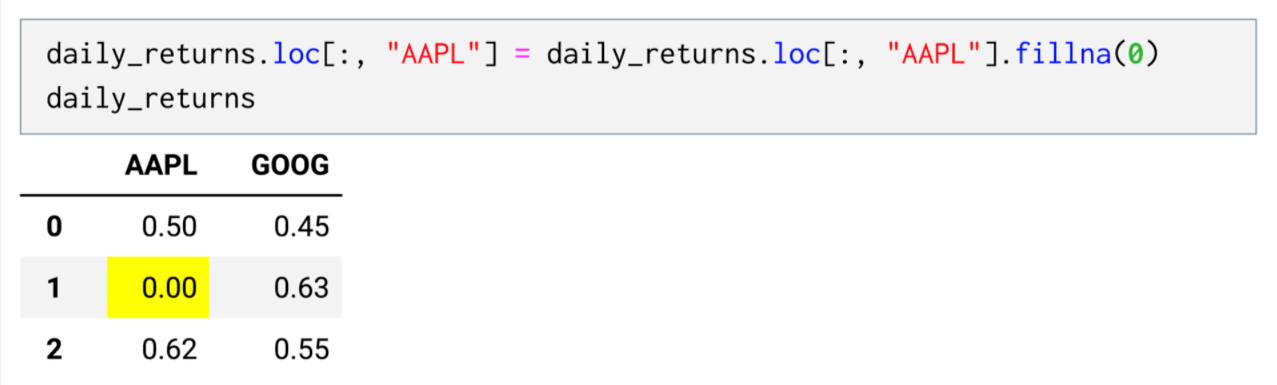

# Let's practice 

https://courses.bootcampspot.com/courses/800/pages/3-dot-2-4-activity-missing-money?module_item_id=234906

PLEASE SHARE YOUR WORK.

# Duplicates
`.duplicated()`


In [33]:
import pandas as pd
best_actors_df = pd.DataFrame({
    "Best Actors": ["Nic Cage", "Nic Cage", "Harrison Ford"]
})
best_actors_df


,Best Actors
0,Nic Cage
1,Nic Cage
2,Harrison Ford


In [34]:
best_actors_df.duplicated()

0    False
1     True
2    False
dtype: bool

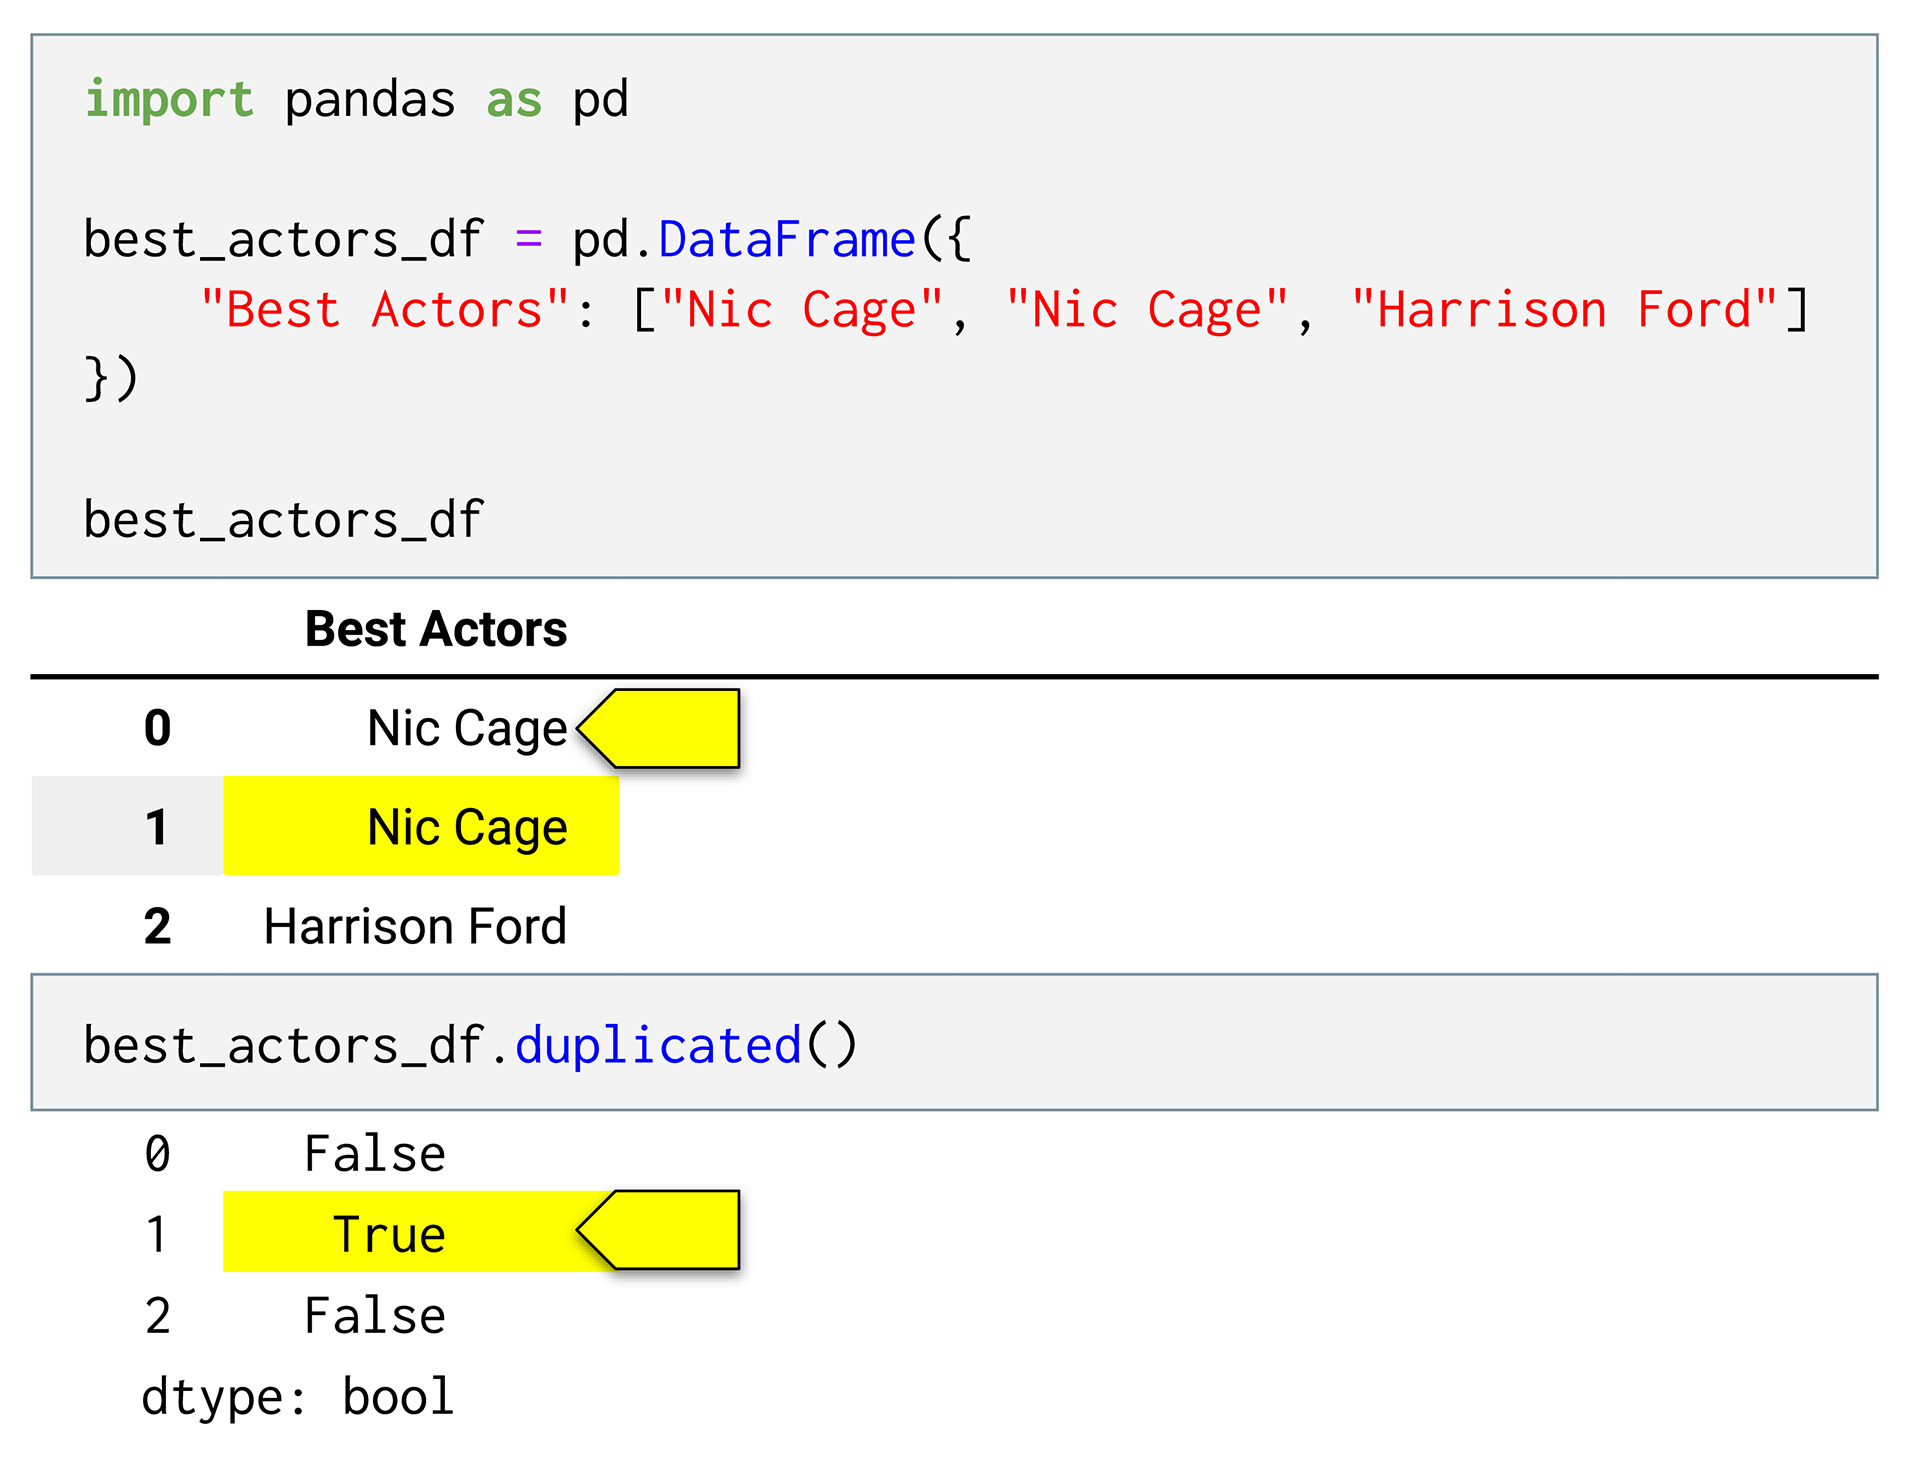

# Count all the duplicates

In [35]:
best_actors_df.duplicated().sum()

1

# Drop the duplicates.
`.drop_duplicates()`

In [ ]:
# Before
best_actors_df

In [39]:
# After removing the duplicates.
best_actors_df = best_actors_df.drop_duplicates()
best_actors_df

,Best Actors
0,Nic Cage
2,Harrison Ford


# Handle Additional Dirty Data
Now that you know how to handle missing and duplicated data, it’s time to turn your attention to other common problems with datasets. Sometimes, datasets have other types of dirty data, which is a loose term for erroneous data. Besides missing and duplicated data, dirty data includes typos, misplaced data, mixed data types, and incorrect symbols or punctuation. You need to fix all these errors in preparation for analysis.

We can group these errors into two categories: text and numbers. Let's begin by examining how to clean up some common problems with text data.

# Identify Messy Text Data




In [49]:
import pandas as pd

prices = pd.DataFrame({
    "price_usd": ["$0.53", "$0.22", "0.34"]
})

prices

,price_usd
0,$0.53
1,$0.22
2,0.34


When we run the code, we get the output that the following image shows. The values in the price_usd column no longer have the dollar signs, but their data type is still a Python object

In [57]:
prices.loc[:,"price_usd"]

0    0.53
1    0.22
2    0.34
Name: price_usd, dtype: object

## Remove the $ sign

In [54]:
prices.loc[:, "price_usd"] = prices.loc[:, "price_usd"].str.replace("$", "")

C:\Users\omarm\AppData\Local\Temp/ipykernel_14216/2639143877.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prices.loc[:, "price_usd"] = prices.loc[:, "price_usd"].str.replace("$", "")


In [56]:
prices.loc[:,"price_usd"]

0    0.53
1    0.22
2    0.34
Name: price_usd, dtype: object

# Change it from object (string) to float.

In [58]:
prices.loc[:, "price_usd"] = prices.loc[:, "price_usd"].astype("float")

In [59]:
prices.loc[:, "price_usd"] 

0    0.53
1    0.22
2    0.34
Name: price_usd, dtype: float64

# Here are some Pandas

https://github.com/OMS1996/DAV-5400/blob/master/Lecture%20Notes/Pandas1.ipynb

# Lets practice
https://courses.bootcampspot.com/courses/800/pages/3-dot-2-7-activity-dollars-and-change?module_item_id=234914

# Statistics 
- mean (average)
- min
- max
- mode
- median
- standard deviation.
- variance.
- CoVariance.
- 25%, 50%, 75%

## Statistical describtion.
- count: The number of elements in the column.
- mean: The average value of the column.
- std: The standard deviation of the values in the column—that is, how spread out the values are (which indicates the  distribution).
- min: The minimum value in the column.
- 25%, 50%, 75%: The values that occupy each respective percentile (which also indicate the distribution). Note that the value that occupies the 50% percentile isn’t the same as the mean, although it’s close.
- max: The maximum value in the column.


## Mean.
(2+4+6)/3


## Standard Deviation.
 the standard deviation is a measure of the amount of variation or dispersion of a set of values. [1] A low standard deviation indicates that the values tend to be close to the mean (also called the expected value) of the set, while a high standard deviation indicates that the values are spread out over a wider range. Standard deviation may be abbreviated SD, and is most commonly represented in mathematical texts and equations by the lower case Greek letter sigma `σ`, for the population standard deviation, or the Latin letter s, for the sample standard deviation. [2]

## Variance.
variance is the expectation of the squared deviation of a random variable from its mean. Variance is a measure of dispersion, meaning it is a measure of how far a set of numbers is spread out from their average value.


# SD vs variance.
The standard deviation is expressed in the same units as the mean is, whereas the variance is expressed in squared units, but for looking at a distribution, you can use either just so long as you are clear about what you are using. For example, a Normal distribution with mean = 10 and sd = 3 is exactly the same thing as a Normal distribution with mean = 10 and variance = 9.

To get all the statistics `data` for our data we use `.describe()`

In [61]:
df.describe()

,Unnamed: 0,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,1191.000000,0.330814,0.255346,0.737760,2.116387,1.721008,3.774496,0.288114
std,687.479818,0.107235,0.096635,0.178715,1.666370,0.537169,2.026636,0.452980
min,1.000000,0.000000,0.000000,0.020000,1.000000,1.000000,1.800000,0.000000
25%,596.000000,0.280000,0.214000,0.652850,1.000000,1.000000,3.100000,0.000000
50%,1191.000000,0.330000,0.260000,0.779412,1.000000,2.000000,3.200000,0.000000
75%,1786.000000,0.370000,0.298800,0.868421,2.000000,2.000000,3.900000,1.000000
max,2381.000000,3.000000,3.000000,1.950000,6.000000,4.000000,10.600000,1.000000


# Thank you !. End of lecture.